In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

/tmp/ipykernel_4443/65408254.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
# get csv files at /workspace/gsv-cities/Dataframes/
csvs = os.listdir('/workspace/gsv-cities/Dataframes/')
df_gsv_cities = pd.DataFrame()
for csv in csvs:
    if "Barcelona" not in csv:
        continue
    csv_file = os.path.join('/workspace/gsv-cities/Dataframes/', csv)
    tmp = pd.read_csv(csv_file)
    df_gsv_cities = pd.concat([df_gsv_cities, tmp], axis=0)

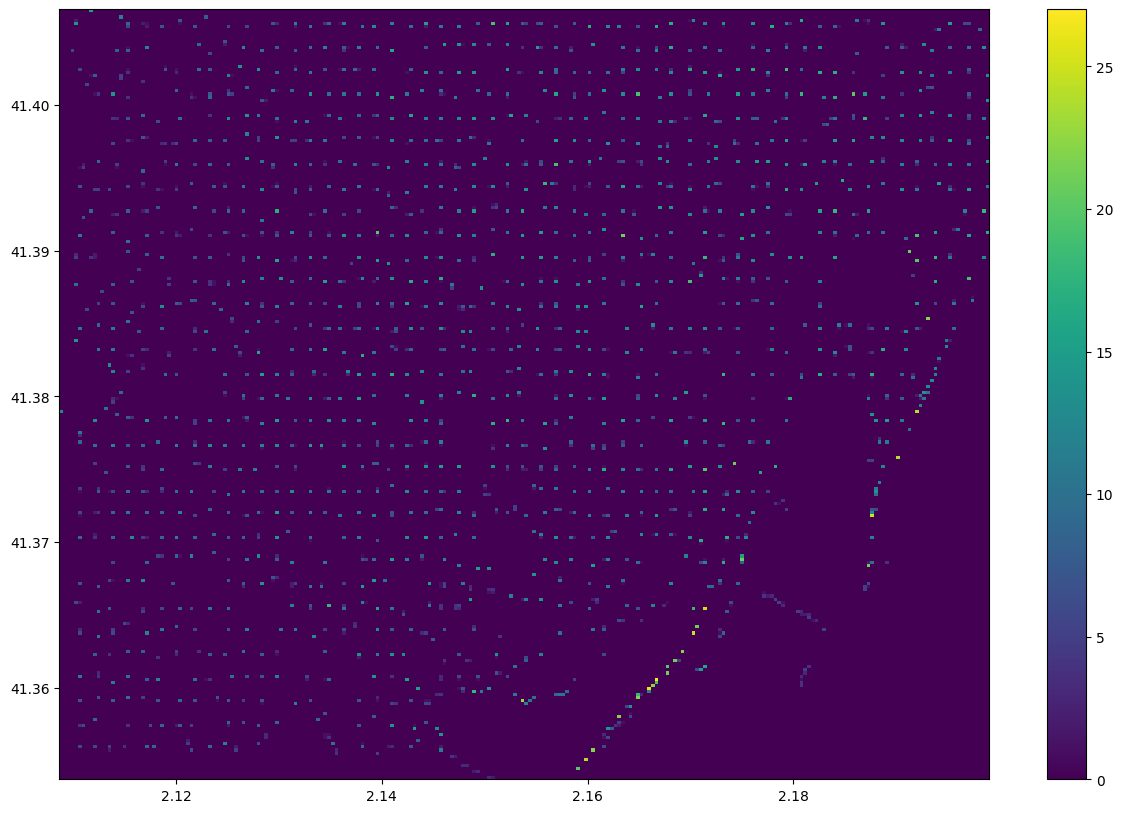

In [17]:
# Make a 2d histogram of lat, lon
plt.figure(figsize=(15, 10))
plt.hist2d(df_gsv_cities['lon'], df_gsv_cities['lat'], bins=250, cmap='viridis')
plt.colorbar()
plt.show()

In [18]:
df_barcelona = pd.read_csv("/workspace/gsv-cities/Dataframes/Barcelona.csv").sample(2000, random_state=42)
df_lisbon = pd.read_csv("/workspace/gsv-cities/Dataframes/Lisbon.csv").sample(2000, random_state=42)

In [19]:
len(df_barcelona), len(df_lisbon)

(2000, 2000)

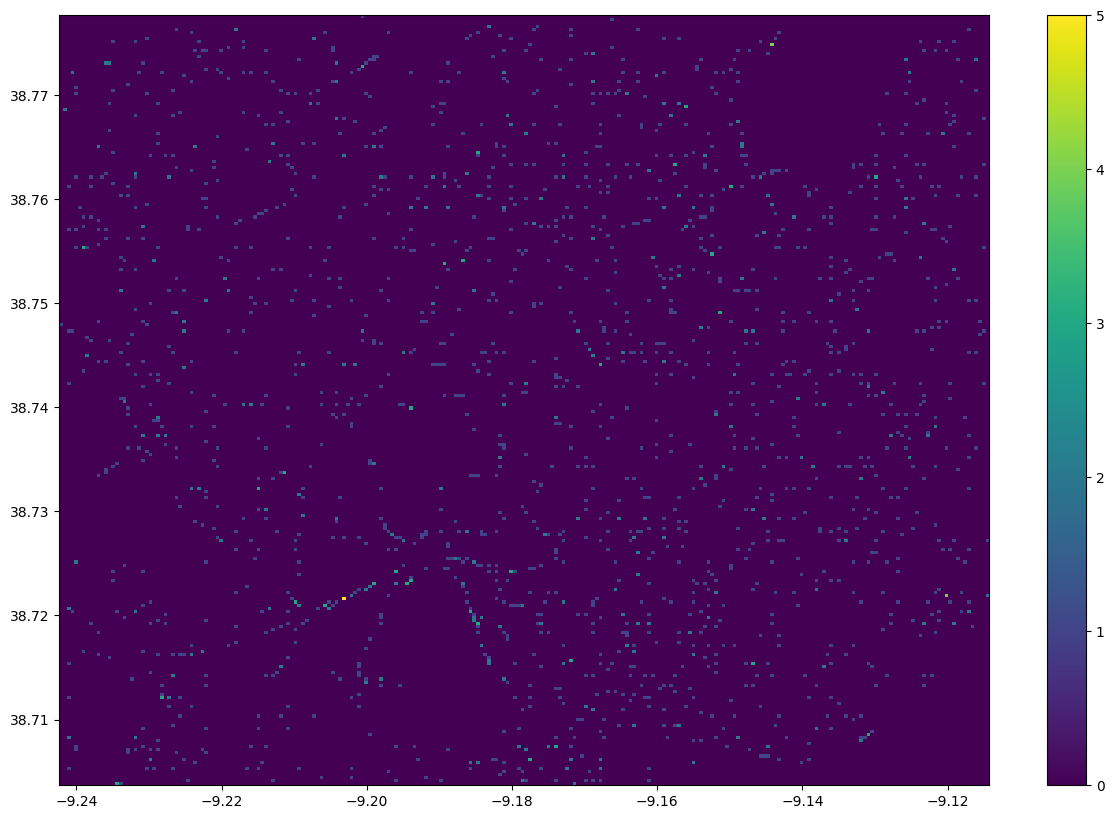

In [20]:
# Make a 2d histogram of lat, lon
plt.figure(figsize=(15, 10))
plt.hist2d(df_lisbon['lon'], df_lisbon['lat'], bins=250, cmap='viridis')
plt.colorbar()
plt.show()

In [21]:
# get csv files at /workspace/gsv-cities/Dataframes/
csvs = os.listdir('/workspace/gsv-cities/Dataframes/')
df_gsv_cities = pd.DataFrame()
for csv in csvs:
    if ("Barcelona" not in csv) and ("Lisbon" not in csv) and ("Madrid" not in csv):
        continue
    csv_file = os.path.join('/workspace/gsv-cities/Dataframes/', csv)
    tmp = pd.read_csv(csv_file)
    df_gsv_cities = pd.concat([df_gsv_cities, tmp], axis=0)

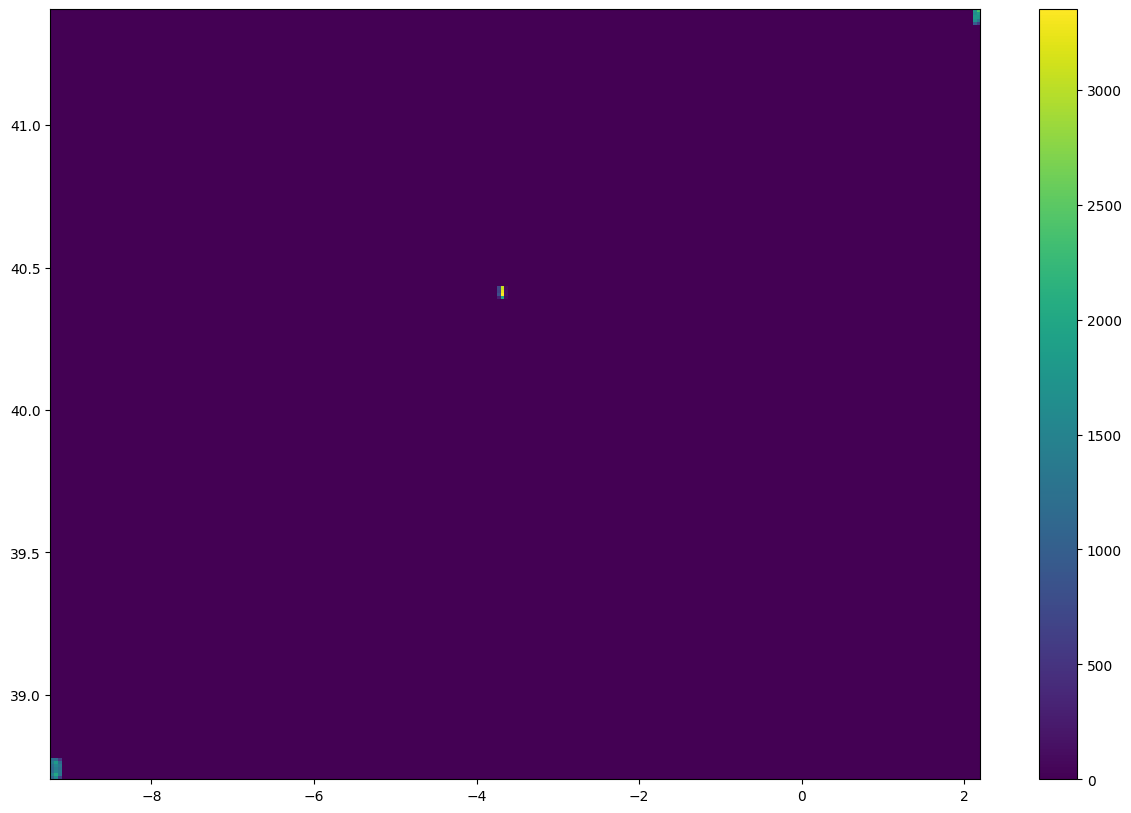

In [22]:
# Make a 2d histogram of lat, lon
plt.figure(figsize=(15, 10))
plt.hist2d(df_gsv_cities['lon'], df_gsv_cities['lat'], bins=250, cmap='viridis')
plt.colorbar()
plt.show()

In [36]:
# For each city, make a 2d linspace grid of lat, lon with 10000 samples each

combinations_b = np.dstack(np.meshgrid(np.linspace(df_barcelona['lon'].min(), df_barcelona['lon'].max(), 100),
    np.linspace(df_barcelona['lat'].min(), df_barcelona['lat'].max(), 100))).reshape(-1, 2)

combinations_l = np.dstack(np.meshgrid(np.linspace(df_lisbon['lon'].min(), df_lisbon['lon'].max(), 100),
    np.linspace(df_lisbon['lat'].min(), df_lisbon['lat'].max(), 100))).reshape(-1, 2)

In [38]:
pd.DataFrame(np.vstack([combinations_b, combinations_l]), columns=['LON', 'LAT']).to_csv("/workspace/SnowCLIP/model/gps_gallery/gallery_barcelona_lisbon.csv", index=False)